# Overfitting demo



In [2]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Crea valori randomici nell'intervallo [0,1]

In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [3]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

Calcola la y = sin(4x)


In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [6]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

In [5]:
data = graphlab.SFrame({'X1':x,'Y':y})


Aggiungi il rumore gaussiano alla y

In [9]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

### Inserisci i dati in un in un SFrame 

In [10]:
data_noise = graphlab.SFrame({'X1':x,'Y':y})


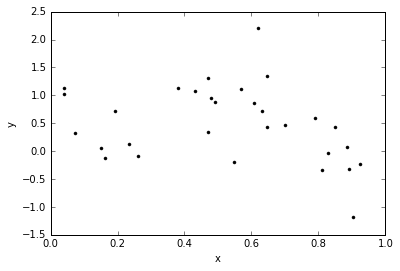

In [11]:
plot_data(data_noise)

### Stampa un grafico con i dati

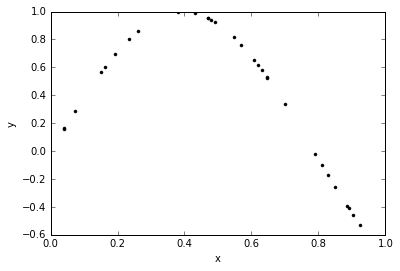

In [7]:
plot_data(data)

## Definisci alcune funzioni per la polynomial regression 

Definisci una funzione per creare le nostre feature per un modello di regressione polinomiale di qualsiasi grado.

In [12]:
# data : SFrame di partenza, deg grado del polinomio 
def polynomial_features(data, deg):
    #copia dell' SFrame in un SFrame copia
    copy=data.copy()
    #creo una colonna per ogni grado del polinomio da 1 a deg
    for i in range(1,deg):
        copy['X'+str(i+1)]=copy['X'+str(i)]*copy['X1']
    return copy

In [13]:
copy =polynomial_features(data_noise,3)
copy

X1,Y,X2,X3
0.0395789449501,1.01644510874,0.00156649288336,6.20001355952e-05
0.0415680996791,1.13180438761,0.00172790691093,7.18258067099e-05
0.0724319480801,0.329915245798,0.00524638710267,0.000380006038229
0.150289044622,0.0559005637594,0.0225867969334,0.0033945481322
0.161334144502,-0.126648112872,0.0260287061823,0.00419931904442
0.191956312795,0.715461996168,0.0368472260218,0.00707305764388
0.232833917145,0.121015620322,0.0542116329729,0.0126223068599
0.259900980166,-0.0956826405167,0.0675485194911,0.0175559264245
0.380145814869,1.13161423979,0.144510840562,0.0549351912429
0.432444723508,1.07630527104,0.18700843889,0.0808708126494


Definisci una funzione per addestrare un modello di polynomial linear regression di grado deg sui dati "data"

In [14]:
#Input : data, un SFrame, deg, grado del polinomio
def polynomial_regression(data, deg):
    #linear_regression.create funzione di graphlab per addestrare il modello
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model

Definisci una funzione per graficare i dati e le predizioni fatte 

In [15]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Considera il grado del polinomio
    deg = len(model.coefficients['value'])-1
    
    # Creazione di 200 punti
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    #Utilizzo del modello per predizione
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # stampa 
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Crea una funzione che stampa i coefficienti del polinomio. 

In [16]:
def print_coefficients(model):    
    # Considera il grado del polinomio
    deg = len(model.coefficients['value'])-1

    #Prendi i parametri del modello come una lista
    w = list(model.coefficients['value'])

    # Numpy ha una funzione per stampare i polinomi, ma è necessario 
    #mettere i parametri in ordine inverso 
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

# Addestro un polinomio di  grado 2

In [17]:
model = polynomial_regression(data_noise, deg=2)

Analizza i coefficienti del modello 

In [18]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-4.526 x + 3.709 x + 0.1332


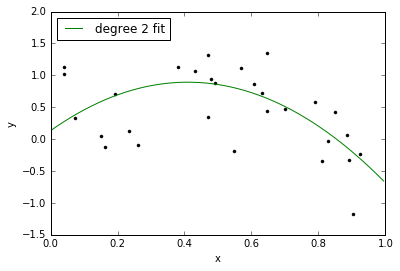

In [19]:
plot_poly_predictions(data_noise,model)

# Addestro un polinomio di  grado 4

Learned polynomial for degree 4:
       4         3         2
39.18 x - 94.19 x + 70.35 x - 17.72 x + 1.555


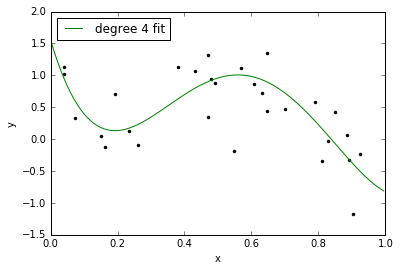

In [20]:
model = polynomial_regression(data_noise, deg=4)
print_coefficients(model)
plot_poly_predictions(data_noise,model)

# Addestro un polinomio di  grado 16

In [21]:
model = polynomial_regression(data_noise, deg=16)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-9.073e+05 x  + 2.257e+06 x  + 9.642e+05 x  - 7.62e+06 x 
              12             11             10             9
 + 7.072e+06 x  + 1.151e+05 x  - 3.592e+06 x  + 4.356e+06 x
              8             7             6             5             4
 - 7.325e+06 x + 8.883e+06 x - 6.261e+06 x + 2.634e+06 x - 6.713e+05 x
              3        2
 + 1.012e+05 x - 8365 x + 317.6 x - 3.241


###Woah!!!!  Those coefficients are *crazy*!  On the order of 10^6.

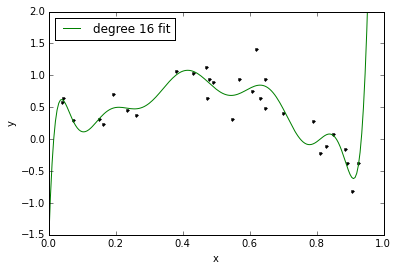

In [16]:
plot_poly_predictions(data_noise,model)

# 

# 

 # 

 # 

# Ridge Regression

Definiamo nuovamente la definizione di regressione polinomiale per risolvere l'overfitting 

In [23]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

## Scegliamo un valore di l2 molto piccolo

In [24]:
model_smallL2 = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=1e-30)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-9.073e+05 x  + 2.257e+06 x  + 9.642e+05 x  - 7.62e+06 x 
              12             11             10             9
 + 7.072e+06 x  + 1.151e+05 x  - 3.592e+06 x  + 4.356e+06 x
              8             7             6             5             4
 - 7.325e+06 x + 8.883e+06 x - 6.261e+06 x + 2.634e+06 x - 6.713e+05 x
              3        2
 + 1.012e+05 x - 8365 x + 317.6 x - 3.241


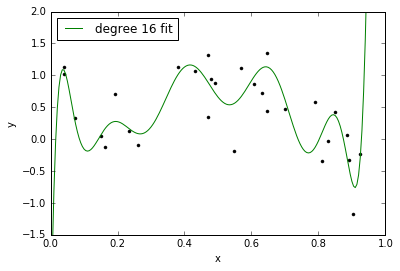

In [25]:
plot_poly_predictions(data_noise,model_smallL2)

## Addestro un polinomio di grado 16 utilizzando un l2_penalty molto grande 

In [26]:
model_bigL2 = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=10000)
print_coefficients(model_bigL2)

Learned polynomial for degree 16:
          16           15           14            13            12
-0.01261 x  - 0.01147 x  - 0.01041 x  - 0.009422 x  - 0.008495 x 
             11            10            9            8            7
 - 0.007625 x  - 0.006805 x  - 0.006029 x - 0.005288 x - 0.004574 x
             6            5            4           3            2
 - 0.003876 x - 0.003182 x - 0.002479 x - 0.00176 x - 0.001047 x - 0.0004266 x + 0.5002


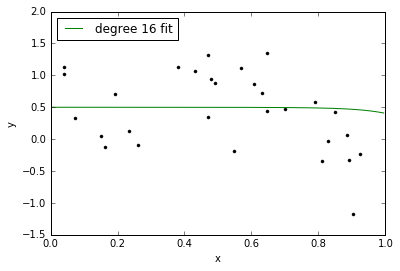

In [28]:
plot_poly_predictions(data_noise,model_bigL2)

## Consideriamo una sequenza crescente di valori di l2

lambda = 1.00e-25
Learned polynomial for degree 16:
            16             15             14            13
-9.073e+05 x  + 2.257e+06 x  + 9.642e+05 x  - 7.62e+06 x 
              12             11             10             9
 + 7.072e+06 x  + 1.151e+05 x  - 3.592e+06 x  + 4.356e+06 x
              8             7             6             5             4
 - 7.325e+06 x + 8.883e+06 x - 6.261e+06 x + 2.634e+06 x - 6.713e+05 x
              3        2
 + 1.012e+05 x - 8365 x + 317.6 x - 3.241


lambda = 1.00e-10
Learned polynomial for degree 16:
           16             15             14             13
9.949e+04 x  - 1.564e+05 x  - 4.531e+04 x  + 7.899e+04 x 
              12        11             10             9             8
 + 8.731e+04 x  + 6147 x  - 6.665e+04 x  - 5.572e+04 x + 2.065e+04 x
              7        6             5             4             3
 + 5.925e+04 x - 2881 x - 5.195e+04 x + 3.679e+04 x - 1.118e+04 x
         2
 + 1732 x - 134.4 x + 4.318


lambda = 1.00e-0

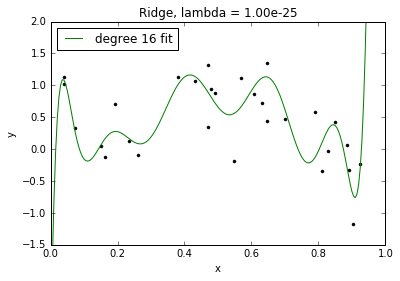

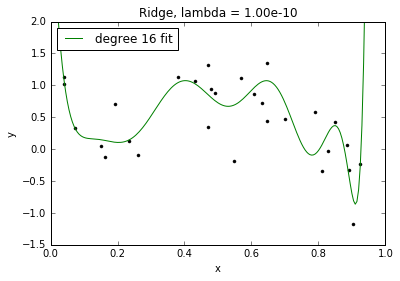

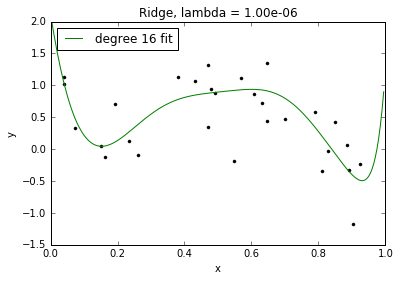

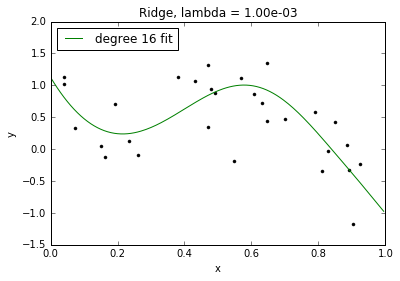

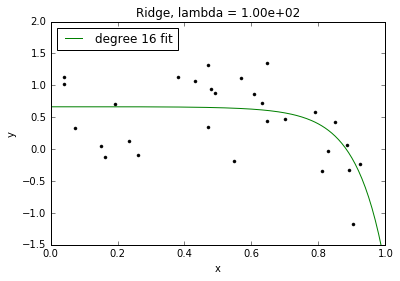

In [30]:
for l2_penalty in [1e-25,1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data_noise,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [23]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


## Scelta di un buon valore di l2 per il polinomio di grado 16 

Leave One Out Cr

In [39]:
# LOO cross validation -- in output MAE
def loo(data, deg, l2_penalty_values):
    # Crea le feature polinomiali
    data = polynomial_features(data_noise, deg)
    
    # Creo num_folds blocchi (dove num_folds è il numero delle osservazioni)
    num_folds = len(data)
    #Utilizzo la funzione di graphlab cross validation
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    #  Per ogni valore di l2_penalty, addestro il modello per ogni blocco e calcolo il MAE. 
    l2_penalty_mae = []
    min_mae = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mae = 0.0
        for train_set, validation_set in folds:
            # addestro il modello
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predizione sul validation set 
            y_test_predicted = model.predict(validation_set)
            # calcolo dell'average error
            next_mae += (abs(y_test_predicted-validation_set['Y'])).sum()
        
        # salvo il valore di MAE per ogni l2_penalty
        next_mae = next_mae/num_folds
        l2_penalty_mae.append(next_mae)
        if min_mae is None or next_mae < min_mae:
            min_mae = next_mae
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mae,best_l2_penalty

RUN LOO cross validation

In [42]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mae,best_l2_penalty = loo(data_noise, 16, l2_penalty_values)

In [48]:
l2_penalty_mae

[0.5180916319345669,
 0.514073833131055,
 0.49868554247643754,
 0.4934079857966934,
 0.48214758535597857,
 0.5542892339961963,
 0.5621129183155238,
 0.5623412872731255,
 0.5623476504427156,
 0.5623478275084166]

In [49]:
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

Plot results of estimating LOO for each value of lambda

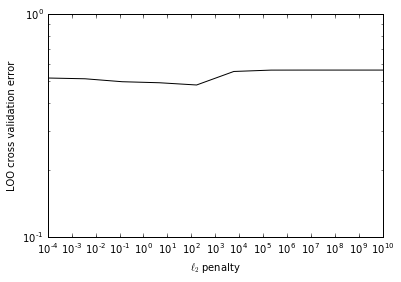

In [50]:
plt.plot(l2_penalty_values,l2_penalty_mae,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

Find the value of lambda, $\lambda_{\mathrm{CV}}$, that minimizes the LOO cross validation error, and plot resulting fit

In [46]:
best_l2_penalty

166.81005372000593

In [47]:
model = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
         16          15          14          13          12         11
-0.2819 x  - 0.2584 x  - 0.2362 x  - 0.2151 x  - 0.1951 x  - 0.176 x 
           10          9          8          7           6           5
 - 0.1575 x  - 0.1397 x - 0.1222 x - 0.1048 x - 0.08716 x - 0.06908 x
            4           3          2
 - 0.05031 x - 0.03109 x - 0.0132 x - 0.001514 x + 0.6437


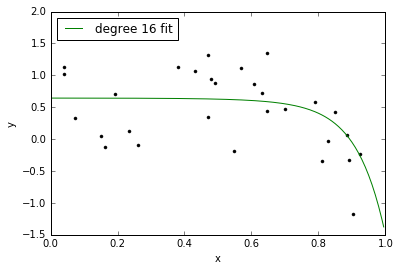

In [38]:
plot_poly_predictions(data_noise,model)